In [5]:
#! -coding:utf8 -*-
import threading,sys
import requests
import time
import os
from pathlib import Path

class MulThreadDownload(threading.Thread):
    def __init__(self,url,startpos,endpos,f):
        super(MulThreadDownload,self).__init__()
        self.url = url
        self.startpos = startpos
        self.endpos = endpos
        self.fd = f

    def download(self):
        print("start thread:%s at %s" % (self.getName(), time.time()))
        headers = {"Range":"bytes=%s-%s"%(self.startpos,self.endpos)}
        res = requests.get(self.url,headers=headers)
        # res.text 是将get获取的byte类型数据自动编码，是str类型， res.content是原始的byte类型数据
        # 所以下面是直接write(res.content)
        self.fd.seek(self.startpos)
        self.fd.write(res.content)
        print("stop thread:%s at %s" % (self.getName(), time.time()))
        # f.close()

    def run(self):
        self.download()


In [ ]:

if __name__ == "__main__":
    url = 'http://overpass-api.de/api/map?bbox=116.23691,39.7372,117.11006,40.5425'
    #获取文件的大小和文件名
    filename = Path(".") / "123.xml"
    filesize = int(requests.head(url).headers['Content-Length'])
    print("%s filesize:%s"%(filename,filesize))

    #线程数
    threadnum = 3
    #信号量，同时只允许3个线程运行
    threading.BoundedSemaphore(threadnum)
    # 默认3线程现在，也可以通过传参的方式设置线程数
    step = filesize // threadnum
    mtd_list = []
    start = 0
    end = -1

    # 请空并生成文件
    tempf = open(filename,'w')
    tempf.close()
    # rb+ ，二进制打开，可任意位置读写
    with open(filename,'rb+') as  f:
        fileno = f.fileno()
        # 如果文件大小为11字节，那就是获取文件0-10的位置的数据。如果end = 10，说明数据已经获取完了。
        while end < filesize -1:
            start = end +1
            end = start + step -1
            if end > filesize:
                end = filesize
            # print("start:%s, end:%s"%(start,end))
            # 复制文件句柄
            dup = os.dup(fileno)
            # print(dup)
            # 打开文件
            fd = os.fdopen(dup,'rb+',-1)
            # print(fd)
            t = MulThreadDownload(url,start,end,fd)
            t.start()
            mtd_list.append(t)

        for i in  mtd_list:
            i.join()

123.xml filesize:8
start thread:Thread-6 at 1559697424.9519506
start thread:Thread-7 at 1559697424.9559472
start thread:Thread-8 at 1559697424.9609566
start thread:Thread-9 at 1559697424.9679534
stop thread:Thread-9 at 1559697440.580404stop thread:Thread-8 at 1559697440.580404

stop thread:Thread-7 at 1559697440.581391


AttributeError: 'NoneType' object has no attribute 'values'

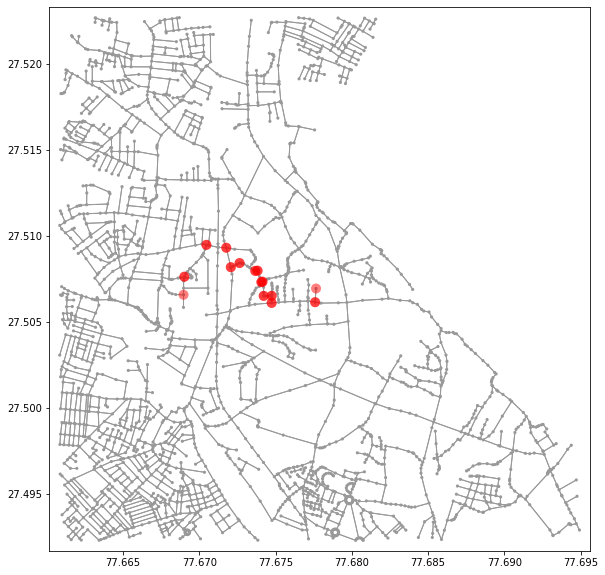

In [3]:
import osmnx as ox, networkx as nx, matplotlib.pyplot as plt, math as m
from haversine import haversine

org = (27.5075, 77.6779)
dst = (27.5067, 77.6694)
dist_fl = (int(haversine(org, dst)*1000))*2
G = ox.graph_from_point(org, simplify=False, distance=dist_fl)
orig_node = ox.get_nearest_node(G, org, method='euclidean')
target_node = ox.get_nearest_node(G, dst, method='euclidean')

nodes, edges = ox.graph_to_gdfs(G)
streets_per_node = ox.count_streets_per_node(G)
route = nx.shortest_path(G, source=orig_node, target=target_node, 
weight='length', method='dijkstra')
node_route = nodes.loc[route]

route_list = [[1352186296, 1352186345], [1352186345, 1352186150, 1350260490, 
1352186112, 1352186349, 1350260516, 4753659536, 4753498382], [4753498382, 
4753498383, 4753498390], [4753498390, 4753498391, 4753498392, 
4753498393, 4753498394], [4753498394, 4753498395, 4753498396, 
4753498397, 4753498398], [4753498398, 4753478108], [4753478108, 
4753498399, 4753498400, 4753498401], [4753498401, 4753498402, 
4753498403], [4753498403, 4753498404, 4753498405, 4753657826, 
4753498406, 4753498407, 4753498408, 4753498409], [4753498409, 4753498410, 4753498411, 4753498412], [4753498412, 3803339674], [3803339674, 1352186110, 1352186253, 2265692728], [2265692728, 1352186308, 1352186133, 1352186328, 1352186316, 1352186071, 1352186187, 1352186095], [1352186095, 1352186361, 1352186263]]

coord_list =[(77.6776527, 27.5069438), (77.6775911, 27.5061476), (77.6747421, 27.5061048), (77.6747447, 27.5065153), (77.6742216, 27.5065135), (77.6741438, 27.507339), (77.6740672, 27.5073159), (77.6738192, 27.5079793), (77.6736687, 27.5079667), (77.6726402, 27.5084229), (77.6720677, 27.5081814), (77.6717673, 27.5093129), (77.6704672, 27.5094812), (77.6690214, 27.507629)]

color_list = ['green', 'green', 'green', 'green', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red']

fig, ax = ox.plot_graph_routes(G, route_list, fig_height=10, fig_width=10, save=True, filename='outfile_data', show=False, close=False, axis_off=False, edge_linewidth=1, node_size=10, route_color = color_list)

plt.show()